In [1]:
from pipeline import pipeline
from chris import ldData, mlpClassification, makeTrainValSet, balanceStupid, NO_DISPLAY_savePred
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
from heinrich import inv, crop, ecgExtract, rfClassification
from anova import anova

# Evaluate Model

  0%|          | 0/200 [00:00<?, ?it/s]

[Pipeline] Saved state found: ./cache/ldData()_crop(300)_inv(0.6)_ecgExtract()_anova(0.7)_makeTrainValSet(0.1), starting from function: mlpClassification
[Pipeline] executing: mlpClassification(200,True,False)


100%|██████████| 200/200 [02:11<00:00,  1.52it/s]

train losses
val losses


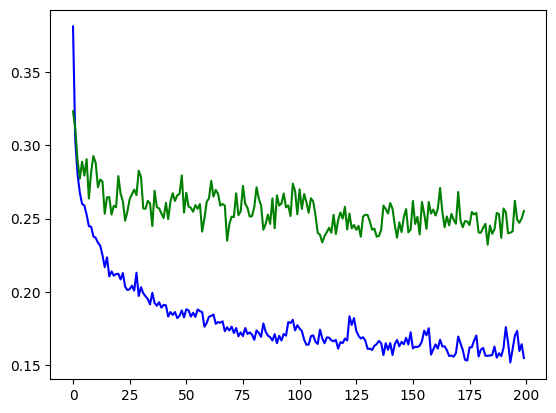

In [18]:
hyper = { 
    
    "inv_threshold": 0.6, 
    "crop_location": 300,
    "mlpClassification_epochs": 200,
    "mlpClassification_useValidationSet": True,
    "mlpClassification_makePrediction": False,
    "makeTrainValSet_valPercent": 0.1,
    "rfClassification_depth": 3,
    "rfClassification_useValidationSet": True,
    "rfClassification_makePrediction": False,
    "anova_percentage": 0.7
}

data = pipeline([ ldData, crop, inv, ecgExtract, anova, makeTrainValSet, mlpClassification ], hyper )
print( "train losses" )
plt.plot( data[ "train_losses" ], color = "blue" )
print( "val losses" )
plt.plot( data[ "val_losses" ], color = "green" )

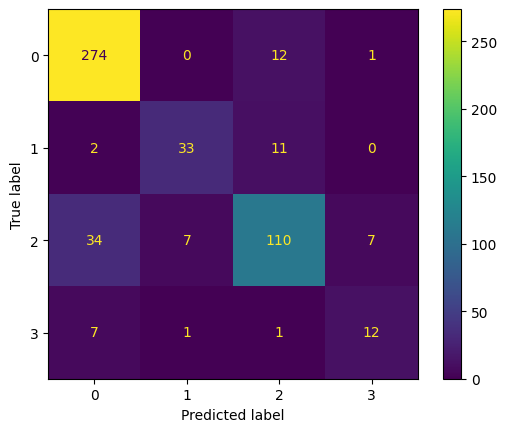

In [14]:
from olin_utils import confMat
_, misclass = confMat( data[ "y_val_hat" ], np.transpose( data[ "y_val" ])[ 0 ], visualize = True )

# Predict

[Pipeline] Saved state found: ./cache/ldData()_crop(300)_inv(0.6)_ecgExtract()_anova(0.7), starting from function: rfClassification
[Pipeline] executing: rfClassification(3,False,True)


/usr/local/share/miniconda/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Pipeline] executing: NO_DISPLAY_savePred()
train losses


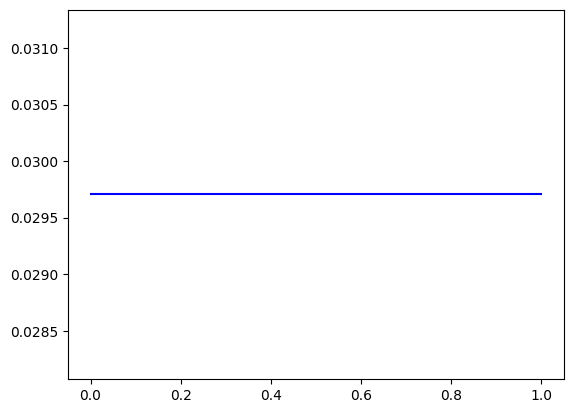

In [17]:
hyper = { 
    
    "inv_threshold": 0.6, 
    "crop_location": 300,
    "mlpClassification_epochs": 150,
    "mlpClassification_useValidationSet": False,
    "mlpClassification_makePrediction": True,
    "makeTrainValSet_valPercent": 0.1,
    "rfClassification_depth": 3,
    "rfClassification_useValidationSet": False,
    "rfClassification_makePrediction": True,
    "anova_percentage": 0.7
}

data = pipeline([ ldData, crop, inv, ecgExtract, anova, rfClassification, NO_DISPLAY_savePred ], hyper )
print( "train losses" )
plt.plot( data[ "train_losses" ], color = "blue" )